In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from data_utils import *
from eda_utils import *
from train_utils import *

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [6]:
phyt_cod_path = 'data/PHYT_COD_ForDvirLafer.csv'
phyto_path = 'data/Phyto4DvirLafer.csv'

biomass_by_week_year_group = get_biomass_data(phyt_cod_path, phyto_path)

In [4]:
fp_path = 'data/FP_2017_ForDvirLafer.csv'

fp_df = get_fluorprobe_data(fp_path)

In [7]:
biomass_test = biomass_by_week_year_group[(biomass_by_week_year_group['year'] == 2022) & (biomass_by_week_year_group['month'] >= 3)]
biomass_val = biomass_by_week_year_group[(biomass_by_week_year_group['year'] == 2022) & (biomass_by_week_year_group['month'] < 3)]
biomass_train = biomass_by_week_year_group[(~biomass_by_week_year_group.index.isin(biomass_test.index)) & (~biomass_by_week_year_group.index.isin(biomass_val.index))]

fp_test = fp_df[(fp_df['year'] == 2022) & (fp_df['month'] >= 3)]
fp_val = fp_df[(fp_df['year'] == 2022) & (fp_df['month'] < 3)]
fp_train = fp_df[(~fp_df.index.isin(fp_test.index)) & (~fp_df.index.isin(fp_val.index))]

merged_train = merge_fp_biomass_df(fp_train, biomass_train, is_train=True) # Merging fully
merged_val = merge_fp_biomass_df(fp_val, biomass_val, is_train=False) # Merging only closest records by depth
merged_test = merge_fp_biomass_df(fp_test, biomass_test, is_train=False) # Merging only closest records by depth

In [28]:
fluor_train_df = merge_fp_biomass_df(fp_train.drop('Depth', axis=1), biomass_train, is_train=False)
fluor_train_df = fluor_train_df[['group_num', 'month', 'week', 'year', 'Depth', 'sum_biomass_ug_ml', 'Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta']].reset_index(drop=True)

In [8]:
merged_train = merged_train.drop(['Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta'], axis=1).reset_index(drop=True)

fluor_groups_map = {
    2: 'Bluegreen',
    3: 'Diatoms',
    4: 'Green Algae',
    6: 'Cryptophyta'
}

fluor_val_df = merged_val[['group_num', 'month', 'week', 'year', 'Depth', 'sum_biomass_ug_ml', 'Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta']].reset_index(drop=True)
merged_val = merged_val.drop(['Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta'], axis=1).reset_index(drop=True)

fluor_test_df = merged_test[['group_num', 'month', 'week', 'year', 'Depth', 'sum_biomass_ug_ml', 'Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta']].reset_index(drop=True)
merged_test = merged_test.drop(['Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta'], axis=1).reset_index(drop=True)

In [80]:
fluor_train_df.shape

(2590, 10)

In [38]:
fluor_train_df.loc[fluor_train_df['Depth'] >= 21, 'Depth'] = 21

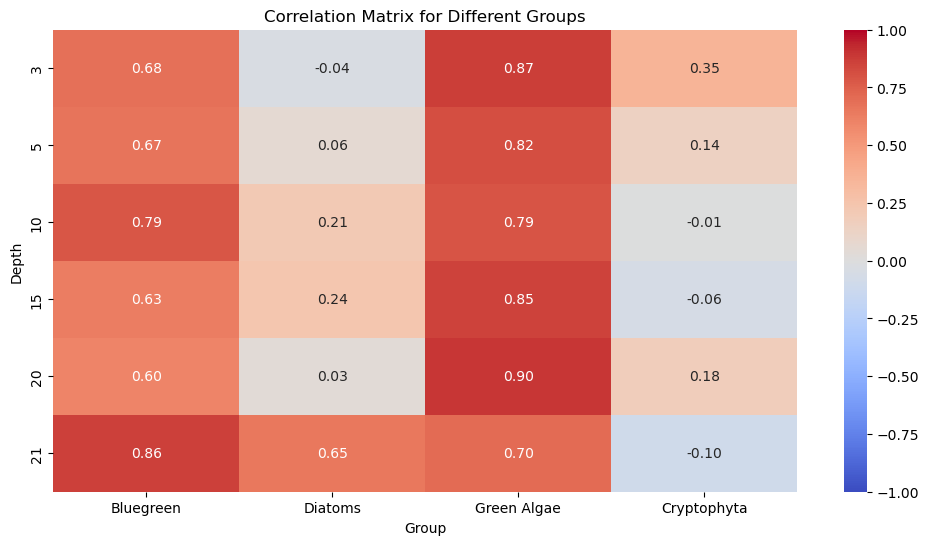

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'fluor_val_df' DataFrame and defined 'fluor_groups_map' as provided

# Create a DataFrame containing only the relevant columns
relevant_columns = ['Depth', 'group_num', 'sum_biomass_ug_ml'] + [fluor_groups_map[group_num] for group_num in fluor_groups_map.keys()]
df_relevant = fluor_train_df[relevant_columns]

# Initialize an empty dictionary to store correlation results
correlation_results = {}

# Loop through each group and calculate the correlation for each depth
for group_num, column_name in fluor_groups_map.items():
    # Filter the DataFrame for the current group
    group_df = df_relevant[df_relevant['group_num'] == group_num]
    
    # Initialize a dictionary to store correlation results for the current group
    group_correlations = {}
    
    # Group the data by 'depth'
    grouped_by_depth = group_df.groupby('Depth')
    
    # Calculate and store correlation for each depth
    for depth, group_data in grouped_by_depth:
        correlation = group_data[['sum_biomass_ug_ml', column_name]].corr().iloc[0, 1]
        group_correlations[depth] = correlation
    
    # Store the correlation results for the current group
    correlation_results[column_name] = group_correlations

# Optionally, you can visualize the results in a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(correlation_results), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Different Groups')
plt.ylabel('Depth')
plt.xlabel('Group')
plt.show()


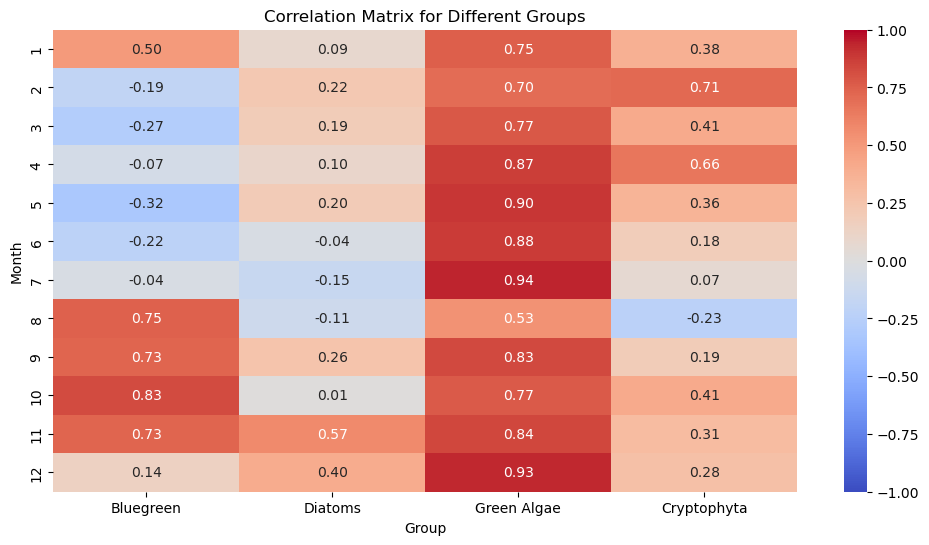

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'fluor_val_df' DataFrame and defined 'fluor_groups_map' as provided

# Create a DataFrame containing only the relevant columns
relevant_columns = ['month', 'group_num', 'sum_biomass_ug_ml'] + [fluor_groups_map[group_num] for group_num in fluor_groups_map.keys()]
df_relevant = fluor_train_df[relevant_columns]

# Initialize an empty dictionary to store correlation results
correlation_results = {}

# Loop through each group and calculate the correlation for each month
for group_num, column_name in fluor_groups_map.items():
    # Filter the DataFrame for the current group
    group_df = df_relevant[df_relevant['group_num'] == group_num]
    
    # Initialize a dictionary to store correlation results for the current group
    group_correlations = {}
    
    # Group the data by 'month'
    grouped_by_month = group_df.groupby('month')
    
    # Calculate and store correlation for each month
    for month, group_data in grouped_by_month:
        correlation = group_data[['sum_biomass_ug_ml', column_name]].corr().iloc[0, 1]
        group_correlations[month] = correlation
    
    # Store the correlation results for the current group
    correlation_results[column_name] = group_correlations


# Optionally, you can visualize the results in a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(correlation_results), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Different Groups')
plt.ylabel('Month')
plt.xlabel('Group')
plt.show()


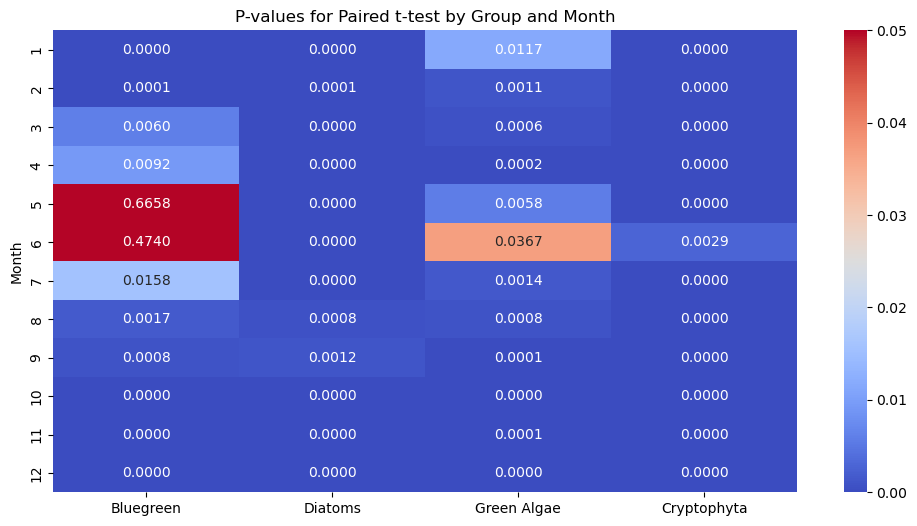

In [51]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'fluor_val_df' DataFrame and defined 'fluor_groups_map' as provided

# Create a DataFrame containing only the relevant columns
relevant_columns = ['month', 'group_num', 'sum_biomass_ug_ml'] + [fluor_groups_map[group_num] for group_num in fluor_groups_map.keys()]
df_relevant = fluor_train_df[relevant_columns]

# Initialize an empty DataFrame to store p-values for each group by month
p_value_df = pd.DataFrame(columns=['Month'] + list(fluor_groups_map.values()))

# Loop through each group and calculate p-values by month
for group_num, column_name in fluor_groups_map.items():
    group_p_values = []
    
    for month, group_data in df_relevant.groupby('month'):
        # Filter the data for the current group and month
        group_month_df = group_data[group_data['group_num'] == group_num]
        
        # Split the data into two related samples: 'sum_biomass_ug_ml' and the corresponding column values
        biomass_values = group_month_df['sum_biomass_ug_ml']
        group_values = group_month_df[column_name]
        
        # Perform the paired t-test and store the p-value
        _, p_value = stats.ttest_rel(biomass_values, group_values) # H0: the means are equal
        group_p_values.append(p_value)
    
    # Store the p-values for the current group in the DataFrame
    p_value_df[column_name] = group_p_values

# Add the 'Month' column to the DataFrame
p_value_df['Month'] = sorted(df_relevant['month'].unique())

# Set the 'Month' column as the index
p_value_df.set_index('Month', inplace=True)

# Plot the p-values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(p_value_df, annot=True, cmap='coolwarm', fmt=".4f", vmin=0, vmax=0.05)
plt.title('P-values for Paired t-test by Group and Month')
plt.show()


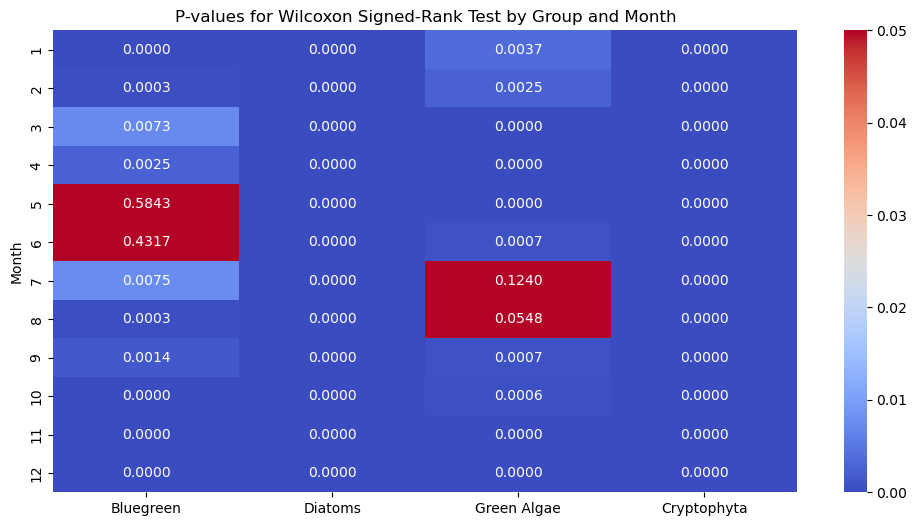

In [59]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'fluor_val_df' DataFrame and defined 'fluor_groups_map' as provided

# Create a DataFrame containing only the relevant columns
relevant_columns = ['month', 'group_num', 'sum_biomass_ug_ml'] + [fluor_groups_map[group_num] for group_num in fluor_groups_map.keys()]
df_relevant = fluor_train_df[relevant_columns]

# Initialize an empty DataFrame to store p-values for each group by month
p_value_df = pd.DataFrame(columns=['Month'] + list(fluor_groups_map.values()))

# Loop through each group and calculate p-values by month using the Wilcoxon signed-rank test
for group_num, column_name in fluor_groups_map.items():
    group_p_values = []
    
    for month, group_data in df_relevant.groupby('month'):
        # Filter the data for the current group and month
        group_month_df = group_data[group_data['group_num'] == group_num]
        
        # Split the data into two related samples: 'sum_biomass_ug_ml' and the corresponding column values
        biomass_values = group_month_df['sum_biomass_ug_ml']
        group_values = group_month_df[column_name]
        
        # Perform the Wilcoxon signed-rank test and store the p-value
        _, p_value = stats.wilcoxon(biomass_values, group_values) # H0: both have the same continous distribution
        group_p_values.append(p_value)
    
    # Store the p-values for the current group in the DataFrame
    p_value_df[column_name] = group_p_values

# Add the 'Month' column to the DataFrame
p_value_df['Month'] = sorted(df_relevant['month'].unique())

# Set the 'Month' column as the index
p_value_df.set_index('Month', inplace=True)

# Plot the p-values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(p_value_df, annot=True, cmap='coolwarm', fmt=".4f", vmin=0, vmax=0.05)
plt.title('P-values for Wilcoxon Signed-Rank Test by Group and Month')
plt.show()


Time Series Analysis for 'Bluegreen' (Group 2):


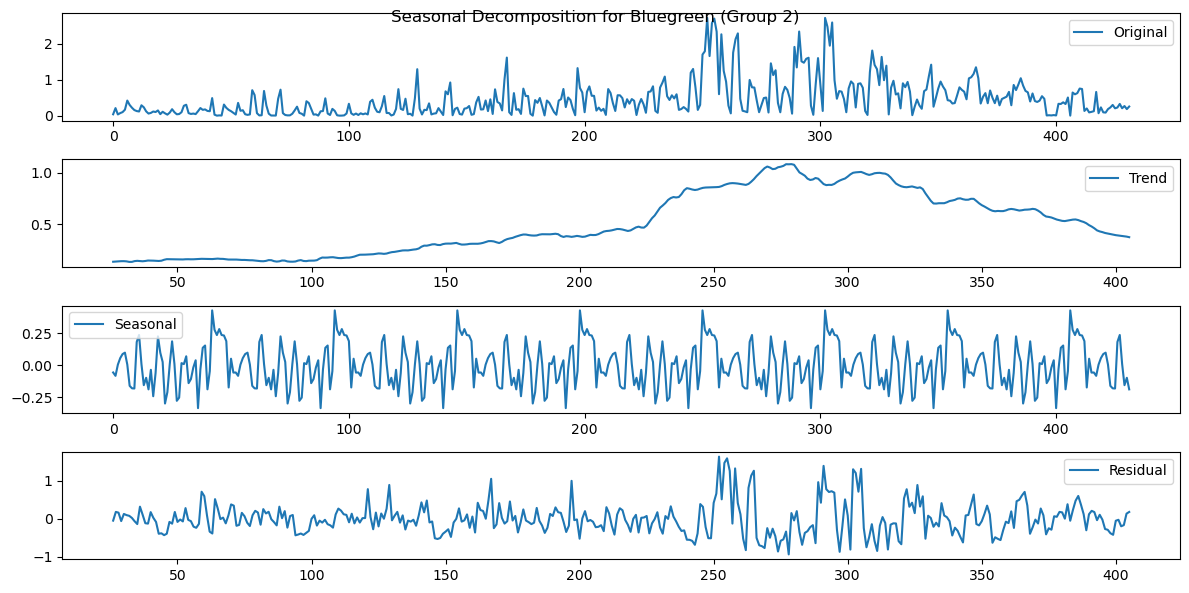

ADF Test for Residuals (p-value): 0.0000


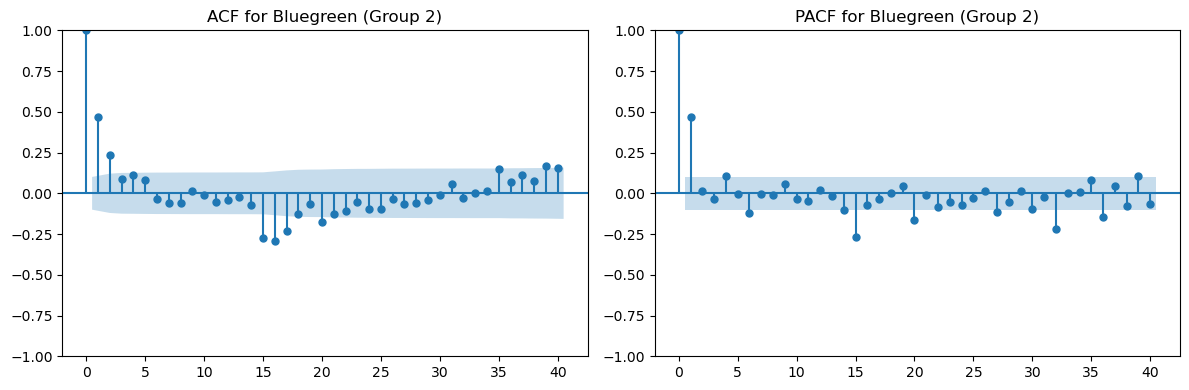

Granger Causality Test for Bluegreen (Group 2):
Lag 1: p-value = 0.0000
Lag 2: p-value = 0.0001
Lag 3: p-value = 0.0004
Lag 4: p-value = 0.0001
Lag 5: p-value = 0.0001
Time Series Analysis for 'Diatoms' (Group 3):


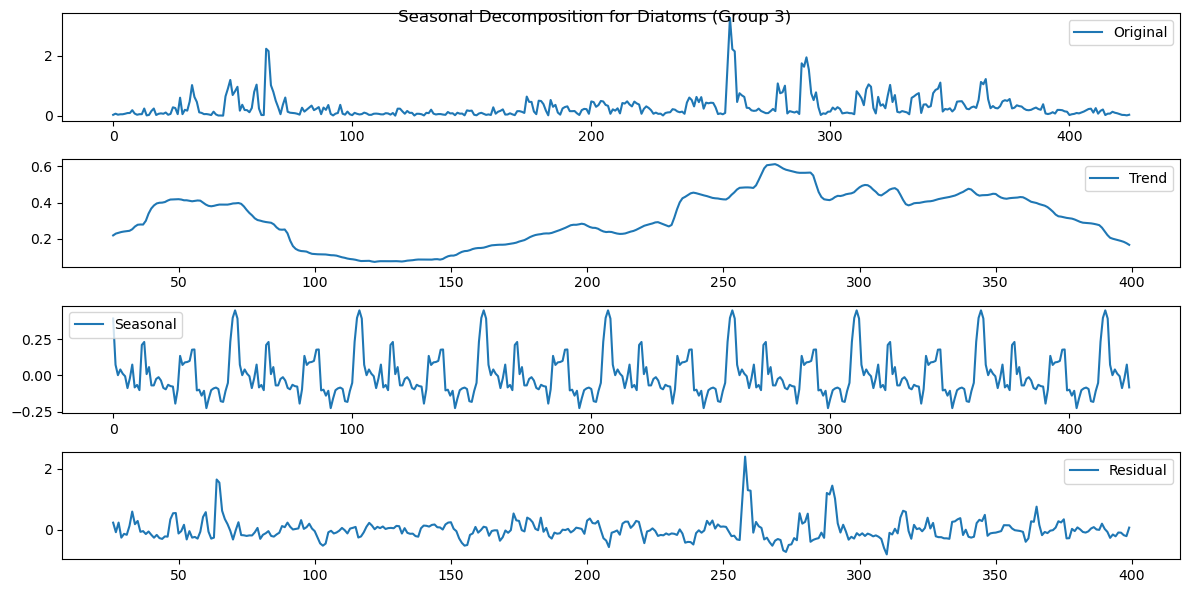

ADF Test for Residuals (p-value): 0.0000


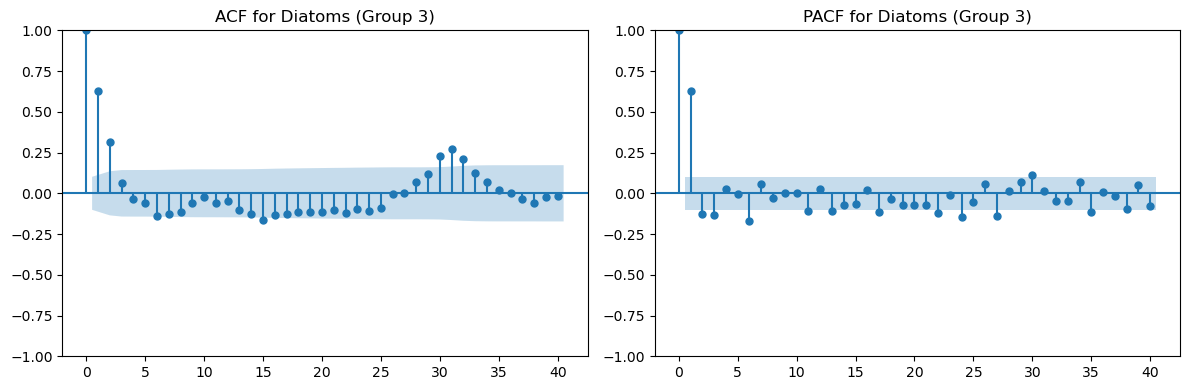

Granger Causality Test for Diatoms (Group 3):
Lag 1: p-value = 0.5516
Lag 2: p-value = 0.9270
Lag 3: p-value = 0.7818
Lag 4: p-value = 0.6188
Lag 5: p-value = 0.7211
Time Series Analysis for 'Green Algae' (Group 4):


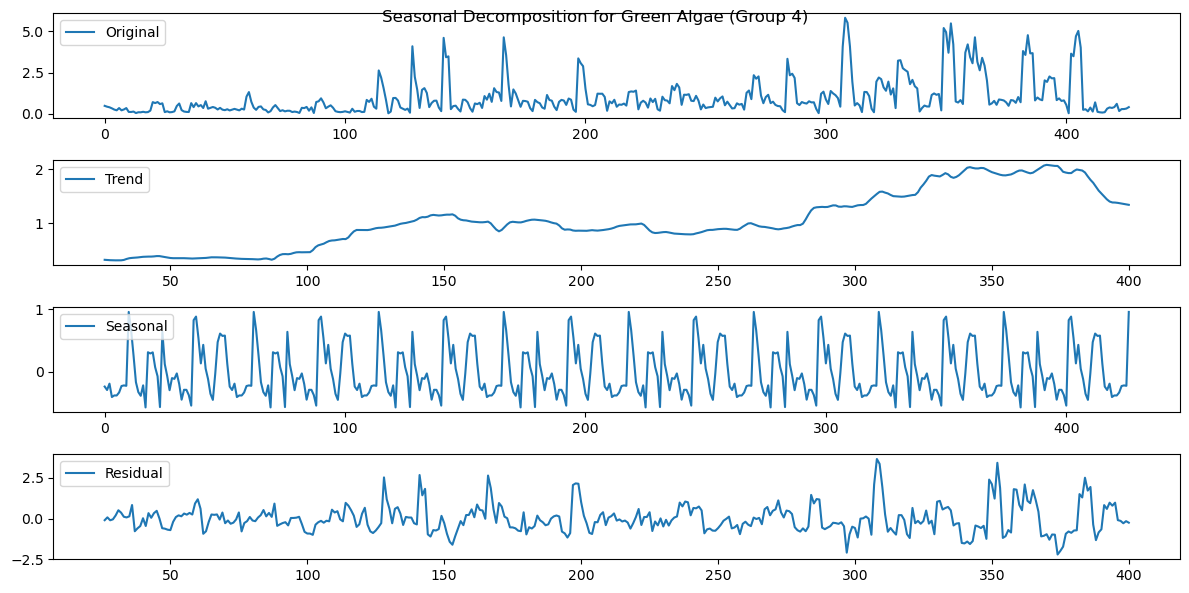

ADF Test for Residuals (p-value): 0.0000


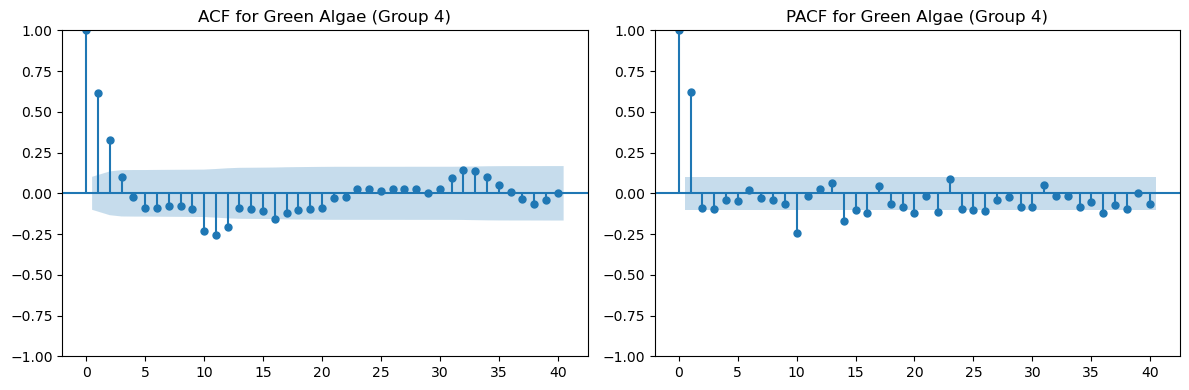

Granger Causality Test for Green Algae (Group 4):
Lag 1: p-value = 0.6085
Lag 2: p-value = 0.0802
Lag 3: p-value = 0.1886
Lag 4: p-value = 0.2267
Lag 5: p-value = 0.2320
Time Series Analysis for 'Cryptophyta' (Group 6):


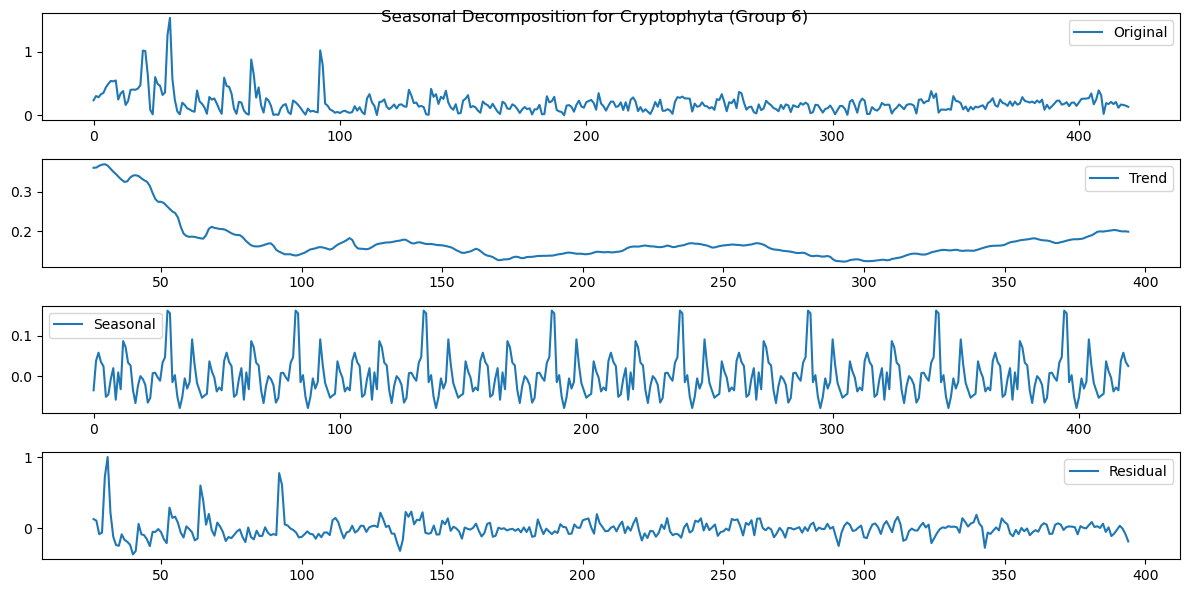

ADF Test for Residuals (p-value): 0.0000


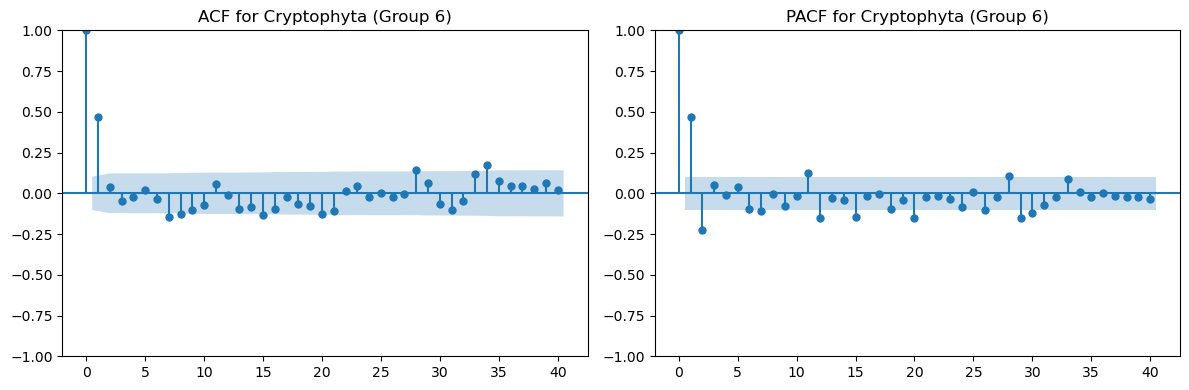

Granger Causality Test for Cryptophyta (Group 6):
Lag 1: p-value = 0.1962
Lag 2: p-value = 0.2987
Lag 3: p-value = 0.1601
Lag 4: p-value = 0.2855
Lag 5: p-value = 0.5088


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming you have already loaded the 'fluor_val_df' DataFrame and defined 'fluor_groups_map' as provided

# Create a DataFrame containing only the relevant columns
relevant_columns = ['group_num', 'sum_biomass_ug_ml', 'Green Algae', 'Bluegreen', 'Diatoms', 'Cryptophyta', 'week', 'year', 'month', 'Depth']
df_relevant = fluor_train_df[relevant_columns]

# Loop through each group and perform time series analysis
for group_num, column_name in fluor_groups_map.items():
    print(f"Time Series Analysis for '{column_name}' (Group {group_num}):")
    
    # Filter the data for the current group
    group_df = df_relevant[df_relevant['group_num'] == group_num]
    
    # Create a time series DataFrame with a multi-index (year and week)
    time_series_df = group_df.set_index(['year', 'week'])
    
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(time_series_df['sum_biomass_ug_ml'], model='additive', period=52)
    
    # Plot the decomposition results
    plt.figure(figsize=(12, 6))
    plt.subplot(411)
    plt.plot(time_series_df['sum_biomass_ug_ml'].values, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(decomposition.trend.values, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(decomposition.seasonal.values, label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(decomposition.resid.values, label='Residual')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.suptitle(f'Seasonal Decomposition for {column_name} (Group {group_num})')
    plt.show()
    
    # Perform Augmented Dickey-Fuller test for stationarity
    adf_result = adfuller(decomposition.resid.dropna())
    print(f"ADF Test for Residuals (p-value): {adf_result[1]:.4f}")
    
    # Plot ACF and PACF for residual autocorrelation
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_acf(decomposition.resid.dropna(), lags=40, ax=plt.gca())
    plt.title(f'ACF for {column_name} (Group {group_num})')
    plt.subplot(122)
    plot_pacf(decomposition.resid.dropna(), lags=40, ax=plt.gca())
    plt.title(f'PACF for {column_name} (Group {group_num})')
    plt.tight_layout()
    plt.show()
    
    # Perform Granger Causality test
    lag = 1  # You can change the lag value as needed
    max_lag = 5  # Maximum lag to test
    print(f"Granger Causality Test for {column_name} (Group {group_num}):")
    for lag in range(1, max_lag + 1):
        granger_test_result = grangercausalitytests(group_df[['sum_biomass_ug_ml', column_name]], maxlag=lag, verbose=False)
        p_value = granger_test_result[lag][0]['ssr_chi2test'][1]
        print(f"Lag {lag}: p-value = {p_value:.4f}")
    
    print("=" * 50)
